In [ ]:
!pip install optuna

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import optuna
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv('/content/Fina Clean Data.csv')

In [ ]:
for column in df.columns:
  df[column] = pd.to_numeric(df[column], errors='coerce')
df.fillna(0, inplace=True)

In [ ]:
X = df.drop(['Loss'], axis=1)
y = df.Loss

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import optuna
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error



def objective(trial):
    alpha = trial.suggest_float("alpha", 1e-4, 10.0)  # Log scale for regularization parameter
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

print("Best parameters:", study.best_params)
print("Best MSE:", study.best_value)


In [ ]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.0038710640055190024)
Lasso.fit(X_train, y_train)
# Evaluate Final Model
y_pred = Lasso.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_mae = mean_absolute_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)
print("Final MSE on Test Data:", final_mse)
print("Final MAE on Test Data:", final_mae)
print("Final R2 on Test Data:", final_r2)

In [ ]:
import optuna
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


def objective(trial):
    alpha = trial.suggest_float("alpha", 1e-4, 10.0)  # Log scale for regularization parameter
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

print("Best parameters:", study.best_params)
print("Best MSE:", study.best_value)


In [ ]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.09892456829536833)
Ridge.fit(X_train, y_train)
# Evaluate Final Model
y_pred = Ridge.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_mae = mean_absolute_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)
print("Final MSE on Test Data:", final_mse)
print("Final MAE on Test Data:", final_mae)
print("Final R2 on Test Data:", final_r2)

In [ ]:
import optuna
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


def objective(trial):
    degree = trial.suggest_int("degree", 1, 5)  # Search space for degree
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    y_pred = model.predict(X_poly_test)

    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

print("Best parameters:", study.best_params)
print("Best MSE:", study.best_value)


In [ ]:
import optuna
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


def objective(trial):
    C = trial.suggest_float("C", 1e-3, 100)  # Regularization parameter
    epsilon = trial.suggest_float("epsilon", 1e-4, 1.0)  # Tolerance for errors
    kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly"])

    model = SVR(C=C, epsilon=epsilon, kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

print("Best parameters:", study.best_params)
print("Best MSE:", study.best_value)


In [ ]:
import optuna
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


def objective(trial):
    max_depth = trial.suggest_int("max_depth", 1, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = DecisionTreeRegressor(max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

print("Best parameters:", study.best_params)
print("Best MSE:", study.best_value)


In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    max_depth = trial.suggest_int("max_depth", 1, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

print("Best parameters:", study.best_params)
print("Best MSE:", study.best_value)


In [ ]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


def objective(trial):
    hidden_units_1 = trial.suggest_int("hidden_units_1", 5, 256)
    hidden_units_2 = trial.suggest_int("hidden_units_2", 5, 256)
    hidden_units_3 = trial.suggest_int("hidden_units_3", 5, 256)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)

    # Build model
    model = Sequential([
    Dense(hidden_units_1, activation='relu', input_shape=(10,)),
    # Dense(hidden_units, activation='relu'),# Input layer with 64 neurons
    Dense(hidden_units_2, activation='relu'),                   # Hidden layer with 32 neurons
    Dense(hidden_units_3, activation='relu'), # Hidden layer with 16 neurons
    Dense(1)                                        # Output layer with 1 neuron (regression)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

    # Train model
    model.fit(X_train, y_train, epochs=100, verbose=0)
    y_pred = model.predict(X_test).flatten()

    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best parameters:", study.best_params)
print("Best MSE:", study.best_value)


In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np


def objective(trial):
    # Hyperparameter suggestions for Random Forest
    rf_n_estimators = trial.suggest_int("rf_n_estimators", 1, 300)
    rf_max_depth = trial.suggest_int("rf_max_depth", 2, 20)

    # Hyperparameter suggestions for Gradient Boosting
    gb_learning_rate = trial.suggest_float("gb_learning_rate", 0.0001, 0.5)
    gb_n_estimators = trial.suggest_int("gb_n_estimators", 1, 300)
    gb_max_depth = trial.suggest_int("gb_max_depth", 2, 20)

    # Hyperparameter suggestions for DTR
    dtr_max_depth = trial.suggest_int("max_depth", 1, 10)
    dtr_min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    dtr_min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    # Hyperparameter suggestions for Ridge (Meta-Model)
    ridge_alpha = trial.suggest_float("ridge_alpha", 0.01, 10.0)

    # Define Base Models
    rf = RandomForestRegressor(n_estimators=rf_n_estimators, max_depth=rf_max_depth, random_state=42)
    gb = GradientBoostingRegressor(learning_rate=gb_learning_rate, n_estimators=gb_n_estimators, max_depth=gb_max_depth, random_state=42)
    # svr = SVR(C=svr_C, epsilon=svr_epsilon)
    dtr = DecisionTreeRegressor(max_depth=dtr_max_depth,
                                  min_samples_split=dtr_min_samples_split,
                                  min_samples_leaf=dtr_min_samples_leaf)

    # Define Meta-Model
    meta_model = Ridge(alpha=ridge_alpha)

    # Define Stacking Regressor
    stack = StackingRegressor(estimators=[('rf', rf), ('gb', gb), ('dtr', dtr)], final_estimator=meta_model)

    # Train Stacking Model
    stack.fit(X_train, y_train)

    # Predict and Evaluate
    y_pred = stack.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    return mse

# Run Optuna Optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Print Best Parameters and Best Score
print("Best Parameters:", study.best_params)
print("Best MSE:", study.best_value)

# Train Final Model with Best Parameters
best_params = study.best_params
rf = RandomForestRegressor(n_estimators=best_params["rf_n_estimators"], max_depth=best_params["rf_max_depth"], random_state=42)
gb = GradientBoostingRegressor(learning_rate=best_params["gb_learning_rate"], n_estimators=best_params["gb_n_estimators"], max_depth=best_params["gb_max_depth"], random_state=42)
# svr = SVR(C=best_params["svr_C"], epsilon=best_params["svr_epsilon"])
dtr = DecisionTreeRegressor(max_depth=5,
                                  min_samples_split=8,
                                  min_samples_leaf=8)
meta_model = Ridge(alpha=best_params["ridge_alpha"])

stack = StackingRegressor(estimators=[('rf', rf), ('gb', gb), ('dtr', dtr)], final_estimator=dtr)
stack.fit(X_train, y_train)

# Evaluate Final Model
y_pred = stack.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_mae = mean_absolute_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)
print("Final MSE on Test Data:", final_mse)
print("Final MAE on Test Data:", final_mae)
print("Final R2 on Test Data:", final_r2)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rf = RandomForestRegressor(n_estimators=117, max_depth=8)
gb = GradientBoostingRegressor(learning_rate=0.30284778490830766, n_estimators=243, max_depth=3)
# svr = SVR(C=best_params["svr_C"], epsilon=best_params["svr_epsilon"])
dtr = DecisionTreeRegressor(max_depth=9,
                                  min_samples_split=15,
                                  min_samples_leaf=8)
meta_model = Ridge(alpha=0.074)

stack = StackingRegressor(estimators=[('rf', rf), ('gb', gb), ('dtr', dtr)], final_estimator=rf)
stack.fit(X_train, y_train)

# Evaluate Final Model
y_pred = stack.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_mae = mean_absolute_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)
print("Final MSE on Test Data:", final_mse)
print("Final MAE on Test Data:", final_mae)
print("Final R2 on Test Data:", final_r2)


In [ ]:
rf = RandomForestRegressor(n_estimators=117, max_depth=8)
rf.fit(X_train, y_train)

# Evaluate Final Model
y_pred = rf.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_mae = mean_absolute_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)
print("Final MSE on Test Data:", final_mse)
print("Final MAE on Test Data:", final_mae)
print("Final R2 on Test Data:", final_r2)

In [ ]:
gb = GradientBoostingRegressor(learning_rate=0.30284778490830766, n_estimators=243, max_depth=3)
gb.fit(X_train, y_train)
# Evaluate Final Model
y_pred = gb.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_mae = mean_absolute_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)
print("Final MSE on Test Data:", final_mse)
print("Final MAE on Test Data:", final_mae)
print("Final R2 on Test Data:", final_r2)

In [ ]:
# svr = SVR(C=best_params["svr_C"], epsilon=best_params["svr_epsilon"])
dtr = DecisionTreeRegressor(max_depth=9,
                                  min_samples_split=15,
                                  min_samples_leaf=8)
dtr.fit(X_train, y_train)
# Evaluate Final Model
y_pred = dtr.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_mae = mean_absolute_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)
print("Final MSE on Test Data:", final_mse)
print("Final MAE on Test Data:", final_mae)
print("Final R2 on Test Data:", final_r2)

In [ ]:
import pickle
stack = pickle.load(open('/content/photonics.pkl', 'rb'))

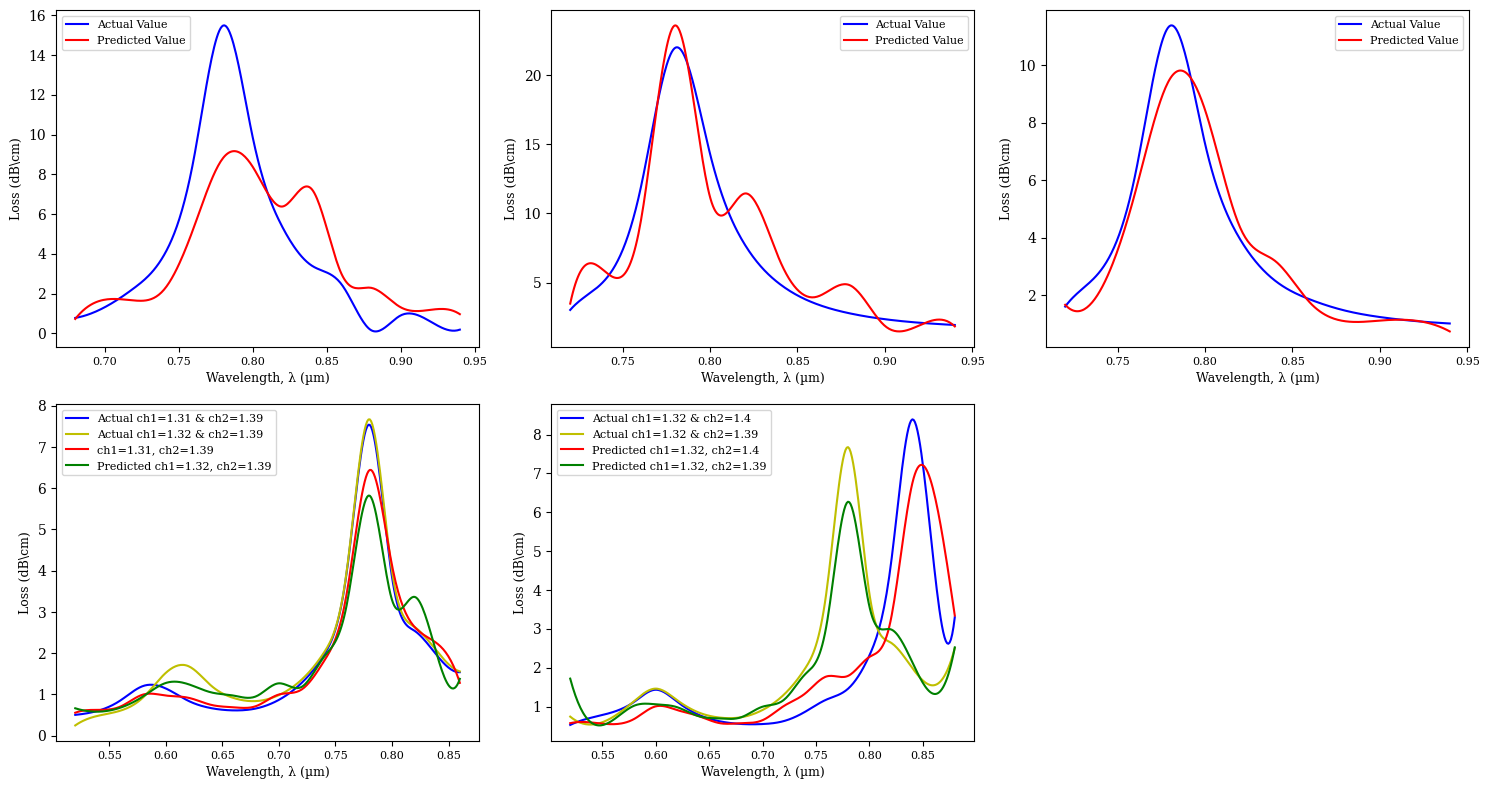

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True

ax = plt.GridSpec(2, 3)
# ax.update(wspace=0.25, hspace=0.3)



plt.rcParams.update({'font.family':'serif'})

ax1 = plt.subplot(ax[0, 0])

test2 = pd.read_csv('/content/2Test 1.39 Optimal.csv')
x = np.array([0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94])
X2 = test2.drop(['Loss'], axis=1)
y = np.array(test2.Loss)
y_pred = np.array(stack.predict(X2))

# Smooth the curves
x_smooth = np.linspace(x.min(), x.max(), 300)
spline_y = make_interp_spline(x, y, k=3)  # Cubic spline interpolation
y_smooth = spline_y(x_smooth)

spline_y_pred = make_interp_spline(x, y_pred, k=3)
y_pred_smooth = spline_y_pred(x_smooth)

plt.plot(x_smooth, y_smooth, linestyle='-', color='b', label='Actual Value')
# plt.scatter(x, y, color='b')  # Show original points in blue
plt.plot(x_smooth, y_pred_smooth, linestyle='-', color='r', label='Predicted Value')
# plt.scatter(x, y_pred, color='r')  # Show predicted points in red
plt.xlabel('Wavelength, λ (µm)', fontsize=9)
plt.ylabel('Loss (dB\cm)', fontsize=9)
plt.xticks(fontsize=8)
# plt.title('Na=1.39', fontsize=9)
plt.legend(fontsize=8, loc='upper left')


ax1 = plt.subplot(ax[0, 1])

test2 = pd.read_csv('/content/2Test 1.39 Less.csv')
x = np.array([0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94])
X2 = test2.drop(['Loss'], axis=1)
y = np.array(test2.Loss)
y_pred = np.array(stack.predict(X2))

# Smooth the curves
x_smooth = np.linspace(x.min(), x.max(), 300)
spline_y = make_interp_spline(x, y, k=3)  # Cubic spline interpolation
y_smooth = spline_y(x_smooth)

spline_y_pred = make_interp_spline(x, y_pred, k=3)
y_pred_smooth = spline_y_pred(x_smooth)

plt.plot(x_smooth, y_smooth, linestyle='-', color='b', label='Actual Value')
# plt.scatter(x, y, color='b')  # Show original points in blue
plt.plot(x_smooth, y_pred_smooth, linestyle='-', color='r', label='Predicted Value')
# plt.scatter(x, y_pred, color='r')  # Show predicted points in red
plt.xlabel('Wavelength, λ (µm)', fontsize=9)
plt.ylabel('Loss (dB\cm)', fontsize=9)
plt.xticks(fontsize=8)
# plt.title('Na=1.39', fontsize=9)
plt.legend(fontsize=8, loc='upper right')




ax1 = plt.subplot(ax[0, 2])

test2 = pd.read_csv('/content/2Test 1.39 Extra.csv')
x = np.array([0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94])
X2 = test2.drop(['Loss'], axis=1)
y = np.array(test2.Loss)
y_pred = np.array(stack.predict(X2))

# Smooth the curves
x_smooth = np.linspace(x.min(), x.max(), 300)
spline_y = make_interp_spline(x, y, k=3)  # Cubic spline interpolation
y_smooth = spline_y(x_smooth)

spline_y_pred = make_interp_spline(x, y_pred, k=3)
y_pred_smooth = spline_y_pred(x_smooth)

plt.plot(x_smooth, y_smooth, linestyle='-', color='b', label='Actual Value')
# plt.scatter(x, y, color='b')  # Show original points in blue
plt.plot(x_smooth, y_pred_smooth, linestyle='-', color='r', label='Predicted Value')
# plt.scatter(x, y_pred, color='r')  # Show predicted points in red
plt.xlabel('Wavelength, λ (µm)', fontsize=9)
plt.ylabel('Loss (dB\cm)', fontsize=9)
plt.xticks(fontsize=8)
# plt.title('Na=1.39', fontsize=9)
plt.legend(fontsize=8, loc='upper right')






ax1 = plt.subplot(ax[1, 0])

test2 = pd.read_csv('/content/2Test 1.31 and 1.39.csv')
test29 = pd.read_csv('/content/2Test 1.33 and 1.39.csv')
x = np.array([0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84,0.86])
x29 = np.array([0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84,0.86])
X2 = test2.drop(['Loss'], axis=1)
y = np.array(test2.Loss)
y_pred = np.array(stack.predict(X2))
X29 = test29.drop(['Loss'], axis=1)
y29 = np.array(test29.Loss)
y_pred29 = np.array(stack.predict(X29))


# Smooth the curves
x_smooth = np.linspace(x.min(), x.max(), 300)
spline_y = make_interp_spline(x, y, k=3)  # Cubic spline interpolation
y_smooth = spline_y(x_smooth)

spline_y_pred = make_interp_spline(x, y_pred, k=3)
y_pred_smooth = spline_y_pred(x_smooth)
spline_y29 = make_interp_spline(x29, y29, k=3)  # Cubic spline interpolation
y_smooth29 = spline_y29(x_smooth)
spline_y_pred29 = make_interp_spline(x29, y_pred29, k=3)
y_pred_smooth29 = spline_y_pred29(x_smooth)

plt.plot(x_smooth, y_smooth, linestyle='-', color='b', label='Actual ch1=1.31 & ch2=1.39')
plt.plot(x_smooth, y_smooth29, linestyle='-', color='y', label='Actual ch1=1.32 & ch2=1.39')
# plt.scatter(x, y, color='b')  # Show original points in blue
plt.plot(x_smooth, y_pred_smooth, linestyle='-', color='r', label='ch1=1.31, ch2=1.39')
# plt.scatter(x, y_pred, color='r')  # Show predicted points in red
plt.plot(x_smooth, y_pred_smooth29, linestyle='-', color='g', label='Predicted ch1=1.32, ch2=1.39')
# plt.scatter(x29, y_pred29, color='g')

plt.xlabel('Wavelength, λ (µm)', fontsize=9)
plt.ylabel('Loss (dB\cm)', fontsize=9)
plt.xticks(fontsize=8)
# plt.title('Na=1.39', fontsize=9)
plt.legend(fontsize=8, loc='upper left')



ax1 = plt.subplot(ax[1, 1])



test2 = pd.read_csv('/content/2Test 1.32 and 1.4.csv')
test29 = pd.read_csv('/content/2Test 1.32 and 1.39.csv')
x = np.array([0.52, 0.54, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.80,0.82, 0.84, 0.86, 0.88])
x29 = np.array([0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84,0.86])
X2 = test2.drop(['Loss'], axis=1)
y = np.array(test2.Loss)
y_pred = np.array(stack.predict(X2))
X29 = test29.drop(['Loss'], axis=1)
y29 = np.array(test29.Loss)
y_pred29 = np.array(stack.predict(X29))


# Smooth the curves
x_smooth = np.linspace(x.min(), x.max(), 300)
spline_y = make_interp_spline(x, y, k=3)  # Cubic spline interpolation
y_smooth = spline_y(x_smooth)

spline_y_pred = make_interp_spline(x, y_pred, k=3)
y_pred_smooth = spline_y_pred(x_smooth)
spline_y29 = make_interp_spline(x29, y29, k=3)  # Cubic spline interpolation
y_smooth29 = spline_y29(x_smooth)
spline_y_pred29 = make_interp_spline(x29, y_pred29, k=3)
y_pred_smooth29 = spline_y_pred29(x_smooth)

plt.plot(x_smooth, y_smooth, linestyle='-', color='b', label='Actual ch1=1.32 & ch2=1.4')
plt.plot(x_smooth, y_smooth29, linestyle='-', color='y', label='Actual ch1=1.32 & ch2=1.39')
# plt.scatter(x, y, color='b')  # Show original points in blue
plt.plot(x_smooth, y_pred_smooth, linestyle='-', color='r', label='Predicted ch1=1.32, ch2=1.4')
# plt.scatter(x, y_pred, color='r')  # Show predicted points in red
plt.plot(x_smooth, y_pred_smooth29, linestyle='-', color='g', label='Predicted ch1=1.32, ch2=1.39')
# plt.scatter(x29, y_pred29, color='g')

plt.xlabel('Wavelength, λ (µm)', fontsize=9)
plt.ylabel('Loss (dB\cm)', fontsize=9)
plt.xticks(fontsize=8)
# plt.title('(E)', fontsize=12, fontweight='bold')
plt.legend(fontsize=8, loc='upper left')



plt.tight_layout()
# plt.savefig('study.png', dpi=900)
plt.show()

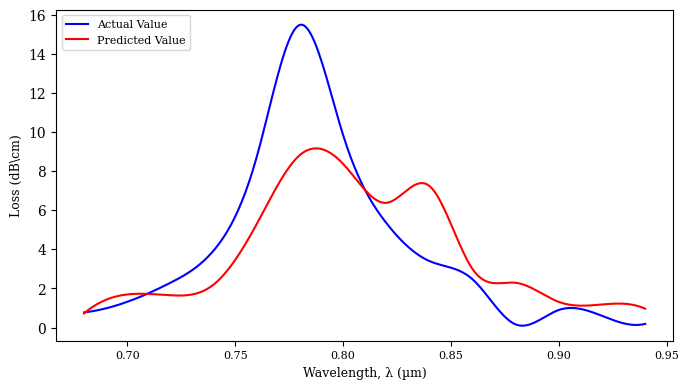

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

plt.rcParams["figure.figsize"] = [7, 4]
plt.rcParams["figure.autolayout"] = True

plt.rcParams.update({'font.family':'serif'})

test2 = pd.read_csv('/content/2Test 1.39 Optimal.csv')
x = np.array([0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94])
X2 = test2.drop(['Loss'], axis=1)
y = np.array(test2.Loss)
y_pred = np.array(stack.predict(X2))

# Smooth the curves
x_smooth = np.linspace(x.min(), x.max(), 300)
spline_y = make_interp_spline(x, y, k=3)  # Cubic spline interpolation
y_smooth = spline_y(x_smooth)

spline_y_pred = make_interp_spline(x, y_pred, k=3)
y_pred_smooth = spline_y_pred(x_smooth)

plt.plot(x_smooth, y_smooth, linestyle='-', color='b', label='Actual Value')
# plt.scatter(x, y, color='b')  # Show original points in blue
plt.plot(x_smooth, y_pred_smooth, linestyle='-', color='r', label='Predicted Value')
# plt.scatter(x, y_pred, color='r')  # Show predicted points in red
plt.xlabel('Wavelength, λ (µm)', fontsize=9)
plt.ylabel('Loss (dB\cm)', fontsize=9)
plt.xticks(fontsize=8)
# plt.title('Na=1.39', fontsize=9)
plt.legend(fontsize=8, loc='upper left')

plt.tight_layout()
plt.savefig('Both 1.39 Optimal.png', dpi=900)
plt.show()

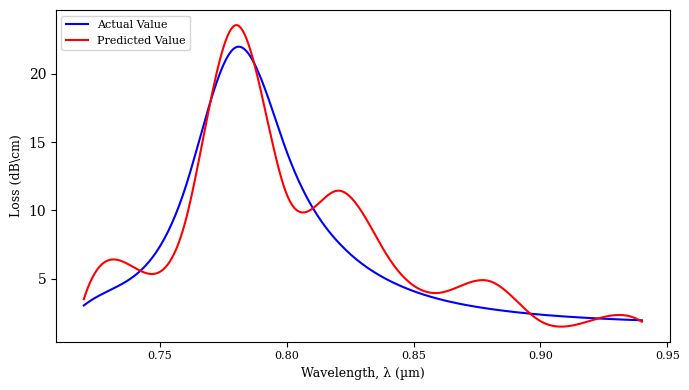

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

plt.rcParams["figure.figsize"] = [7, 4]
plt.rcParams["figure.autolayout"] = True

plt.rcParams.update({'font.family':'serif'})

test2 = pd.read_csv('/content/2Test 1.39 Less.csv')
x = np.array([0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94])
X2 = test2.drop(['Loss'], axis=1)
y = np.array(test2.Loss)
y_pred = np.array(stack.predict(X2))

# Smooth the curves
x_smooth = np.linspace(x.min(), x.max(), 300)
spline_y = make_interp_spline(x, y, k=3)  # Cubic spline interpolation
y_smooth = spline_y(x_smooth)

spline_y_pred = make_interp_spline(x, y_pred, k=3)
y_pred_smooth = spline_y_pred(x_smooth)

plt.plot(x_smooth, y_smooth, linestyle='-', color='b', label='Actual Value')
# plt.scatter(x, y, color='b')  # Show original points in blue
plt.plot(x_smooth, y_pred_smooth, linestyle='-', color='r', label='Predicted Value')
# plt.scatter(x, y_pred, color='r')  # Show predicted points in red
plt.xlabel('Wavelength, λ (µm)', fontsize=9)
plt.ylabel('Loss (dB\cm)', fontsize=9)
plt.xticks(fontsize=8)
# plt.title('Na=1.39', fontsize=9)
plt.legend(fontsize=8, loc='upper left')

plt.tight_layout()
plt.savefig('Both 1.39 Less.png', dpi=900)
plt.show()

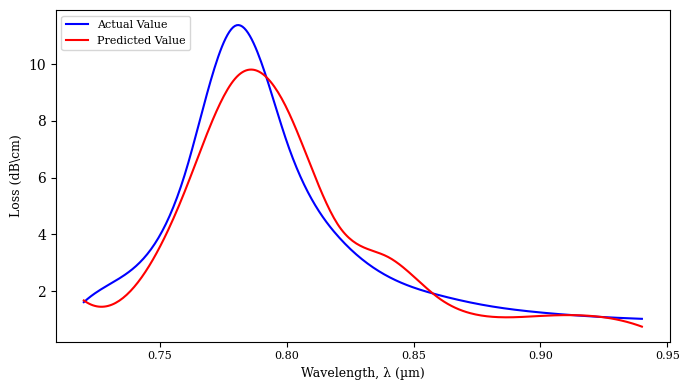

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

plt.rcParams["figure.figsize"] = [7, 4]
plt.rcParams["figure.autolayout"] = True

plt.rcParams.update({'font.family':'serif'})

test2 = pd.read_csv('/content/2Test 1.39 Extra.csv')
x = np.array([0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94])
X2 = test2.drop(['Loss'], axis=1)
y = np.array(test2.Loss)
y_pred = np.array(stack.predict(X2))

# Smooth the curves
x_smooth = np.linspace(x.min(), x.max(), 300)
spline_y = make_interp_spline(x, y, k=3)  # Cubic spline interpolation
y_smooth = spline_y(x_smooth)

spline_y_pred = make_interp_spline(x, y_pred, k=3)
y_pred_smooth = spline_y_pred(x_smooth)

plt.plot(x_smooth, y_smooth, linestyle='-', color='b', label='Actual Value')
# plt.scatter(x, y, color='b')  # Show original points in blue
plt.plot(x_smooth, y_pred_smooth, linestyle='-', color='r', label='Predicted Value')
# plt.scatter(x, y_pred, color='r')  # Show predicted points in red
plt.xlabel('Wavelength, λ (µm)', fontsize=9)
plt.ylabel('Loss (dB\cm)', fontsize=9)
plt.xticks(fontsize=8)
# plt.title('Na=1.39', fontsize=9)
plt.legend(fontsize=8, loc='upper left')

plt.tight_layout()
plt.savefig('Both 1.39 Extra.png', dpi=900)
plt.show()

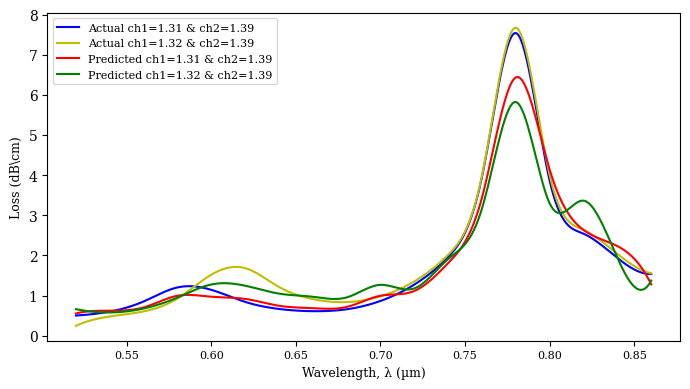

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

plt.rcParams["figure.figsize"] = [7, 4]
plt.rcParams["figure.autolayout"] = True

plt.rcParams.update({'font.family':'serif'})


test2 = pd.read_csv('/content/2Test 1.31 and 1.39.csv')
test29 = pd.read_csv('/content/2Test 1.33 and 1.39.csv')
x = np.array([0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84,0.86])
x29 = np.array([0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84,0.86])
X2 = test2.drop(['Loss'], axis=1)
y = np.array(test2.Loss)
y_pred = np.array(stack.predict(X2))
X29 = test29.drop(['Loss'], axis=1)
y29 = np.array(test29.Loss)
y_pred29 = np.array(stack.predict(X29))


# Smooth the curves
x_smooth = np.linspace(x.min(), x.max(), 300)
spline_y = make_interp_spline(x, y, k=3)  # Cubic spline interpolation
y_smooth = spline_y(x_smooth)

spline_y_pred = make_interp_spline(x, y_pred, k=3)
y_pred_smooth = spline_y_pred(x_smooth)
spline_y29 = make_interp_spline(x29, y29, k=3)  # Cubic spline interpolation
y_smooth29 = spline_y29(x_smooth)
spline_y_pred29 = make_interp_spline(x29, y_pred29, k=3)
y_pred_smooth29 = spline_y_pred29(x_smooth)

plt.plot(x_smooth, y_smooth, linestyle='-', color='b', label='Actual ch1=1.31 & ch2=1.39')
plt.plot(x_smooth, y_smooth29, linestyle='-', color='y', label='Actual ch1=1.32 & ch2=1.39')
# plt.scatter(x, y, color='b')  # Show original points in blue
plt.plot(x_smooth, y_pred_smooth, linestyle='-', color='r', label='Predicted ch1=1.31 & ch2=1.39')
# plt.scatter(x, y_pred, color='r')  # Show predicted points in red
plt.plot(x_smooth, y_pred_smooth29, linestyle='-', color='g', label='Predicted ch1=1.32 & ch2=1.39')
# plt.scatter(x29, y_pred29, color='g')

plt.xlabel('Wavelength, λ (µm)', fontsize=9)
plt.ylabel('Loss (dB\cm)', fontsize=9)
plt.xticks(fontsize=8)
# plt.title('Na=1.39', fontsize=9)
plt.legend(fontsize=8, loc='upper left')


plt.tight_layout()
plt.savefig('Channel 1 change channel 2 fixed.png', dpi=900)
plt.show()

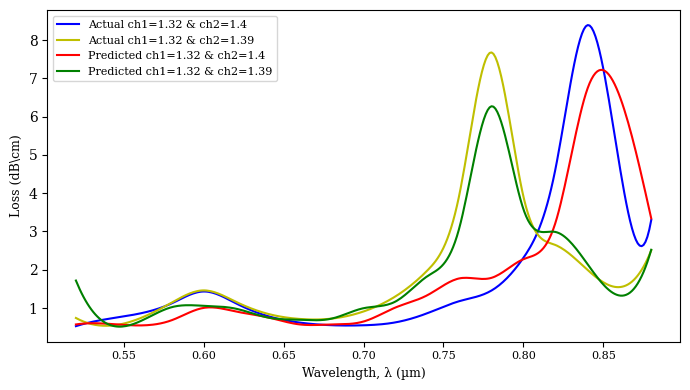

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

plt.rcParams["figure.figsize"] = [7, 4]
plt.rcParams["figure.autolayout"] = True

plt.rcParams.update({'font.family':'serif'})


test2 = pd.read_csv('/content/2Test 1.32 and 1.4.csv')
test29 = pd.read_csv('/content/2Test 1.32 and 1.39.csv')
x = np.array([0.52, 0.54, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.80,0.82, 0.84, 0.86, 0.88])
x29 = np.array([0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84,0.86])
X2 = test2.drop(['Loss'], axis=1)
y = np.array(test2.Loss)
y_pred = np.array(stack.predict(X2))
X29 = test29.drop(['Loss'], axis=1)
y29 = np.array(test29.Loss)
y_pred29 = np.array(stack.predict(X29))


# Smooth the curves
x_smooth = np.linspace(x.min(), x.max(), 300)
spline_y = make_interp_spline(x, y, k=3)  # Cubic spline interpolation
y_smooth = spline_y(x_smooth)

spline_y_pred = make_interp_spline(x, y_pred, k=3)
y_pred_smooth = spline_y_pred(x_smooth)
spline_y29 = make_interp_spline(x29, y29, k=3)  # Cubic spline interpolation
y_smooth29 = spline_y29(x_smooth)
spline_y_pred29 = make_interp_spline(x29, y_pred29, k=3)
y_pred_smooth29 = spline_y_pred29(x_smooth)

plt.plot(x_smooth, y_smooth, linestyle='-', color='b', label='Actual ch1=1.32 & ch2=1.4')
plt.plot(x_smooth, y_smooth29, linestyle='-', color='y', label='Actual ch1=1.32 & ch2=1.39')
# plt.scatter(x, y, color='b')  # Show original points in blue
plt.plot(x_smooth, y_pred_smooth, linestyle='-', color='r', label='Predicted ch1=1.32 & ch2=1.4')
# plt.scatter(x, y_pred, color='r')  # Show predicted points in red
plt.plot(x_smooth, y_pred_smooth29, linestyle='-', color='g', label='Predicted ch1=1.32 & ch2=1.39')
# plt.scatter(x29, y_pred29, color='g')

plt.xlabel('Wavelength, λ (µm)', fontsize=9)
plt.ylabel('Loss (dB\cm)', fontsize=9)
plt.xticks(fontsize=8)
# plt.title('(E)', fontsize=12, fontweight='bold')
plt.legend(fontsize=8, loc='upper left')



plt.tight_layout()
plt.savefig('Channel 1 fix channel 2 change.png', dpi=900)
plt.show()